Number of rows for DS3_v2: 3638
Number of rows for DS2_v2: 4573
Number of rows for D4s_v3: 3255
Number of rows for B4ms: 9301
Number of rows for D2as_v4: 3865
Number of rows for B2ms: 9201


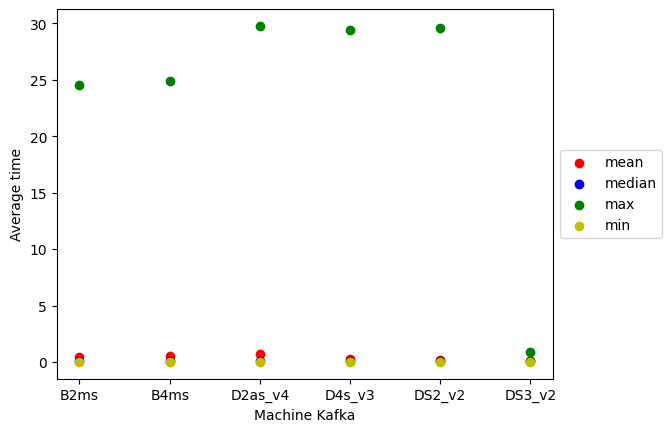

In [18]:
# Visualize data
import matplotlib.pyplot as plt
from ast import literal_eval
import os
import random
import string
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark import SparkConf, SparkContext
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

conf = SparkConf().setAppName("appName").setMaster("local")
sc = SparkContext.getOrCreate(conf=conf)
spark = SparkSession(sc)


# Get the list of files
files = os.listdir('data')

data = pd.read_csv('data/data_Kafka_train.csv')


# get the max value of average time of B2ms


# print the number of rows for each kafka machine with the name of the machine
for i in data['machine_kafka'].unique():
    print("Number of rows for "+i+": "+str(len(data[data['machine_kafka'] == i])))



# for each kafka machine, get the average time, the median time, the max and the min and keep the machine_kafka column
data = data.groupby('machine_kafka').agg({'average': ['mean', 'median', 'max', 'min']}).reset_index()




# Visualize the difference between the average time and the machine kafka, color for each kafka machine
for i in range(0, len(data)):
    plt.scatter(data['machine_kafka'][i], data['average']['mean'][i], c='r', label='mean')
    plt.scatter(data['machine_kafka'][i], data['average']['median'][i], c='b', label='median')
    plt.scatter(data['machine_kafka'][i], data['average']['max'][i], c='g', label='max')
    plt.scatter(data['machine_kafka'][i], data['average']['min'][i], c='y', label='min')

# Draw the legend outside only unique names
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Machine Kafka')
plt.ylabel('Average time')
plt.show()



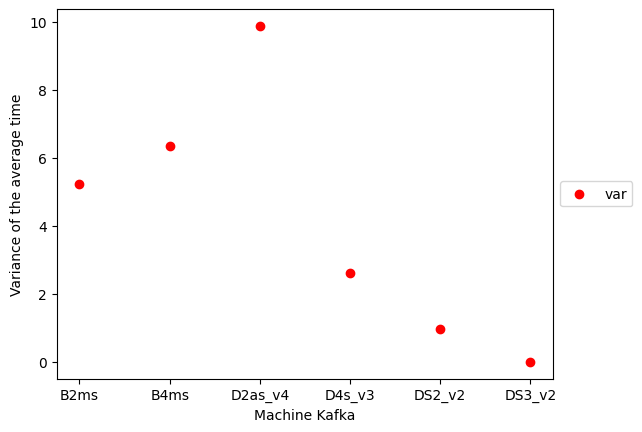

In [2]:
# Visualize data
import matplotlib.pyplot as plt
from ast import literal_eval
import os
import random
import string
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark import SparkConf, SparkContext
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

conf = SparkConf().setAppName("appName").setMaster("local")
sc = SparkContext.getOrCreate(conf=conf)
spark = SparkSession(sc)


# Get the list of files
files = os.listdir('data')

data = pd.read_csv('data/data_Kafka_train.csv')

# visualize the variance of the average time for each kafka machine

# for each kafka machine, get the average time, the median time, the max and the min and keep the machine_kafka column
data = data.groupby('machine_kafka').agg({'average': ['var']}).reset_index()

# Visualize the variance of the average time and the machine kafka, color for each kafka machine
for i in range(0, len(data)):
    plt.scatter(data['machine_kafka'][i], data['average']['var'][i], c='r', label='var')


# Draw the legend outside only unique names
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Machine Kafka')
plt.ylabel('Variance of the average time')
plt.show()

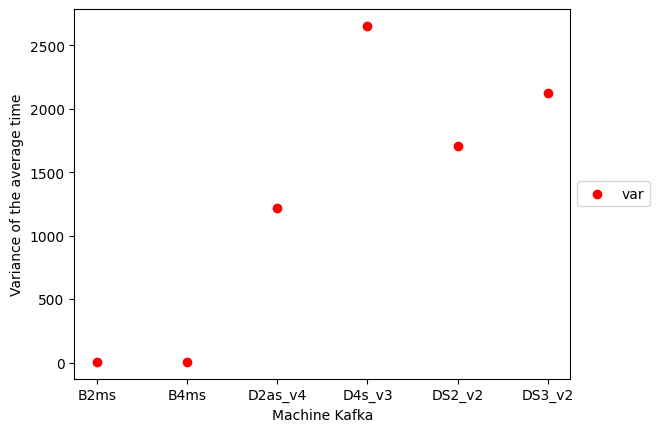

In [3]:
# Visualize data
import matplotlib.pyplot as plt
from ast import literal_eval
import os
import random
import string
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark import SparkConf, SparkContext
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

conf = SparkConf().setAppName("appName").setMaster("local")
sc = SparkContext.getOrCreate(conf=conf)
spark = SparkSession(sc)


# Get the list of files
files = os.listdir('data')

data = pd.read_csv('data/merge_all.csv')

# visualize the variance of the average time for each kafka machine

# for each kafka machine, get the average time, the median time, the max and the min and keep the machine_kafka column
data = data.groupby('machine_kafka').agg({'average': ['var']}).reset_index()

# Visualize the variance of the average time and the machine kafka, color for each kafka machine
for i in range(0, len(data)):
    plt.scatter(data['machine_kafka'][i], data['average']['var'][i], c='r', label='var')


# Draw the legend outside only unique names
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Machine Kafka')
plt.ylabel('Variance of the average time')
plt.show()

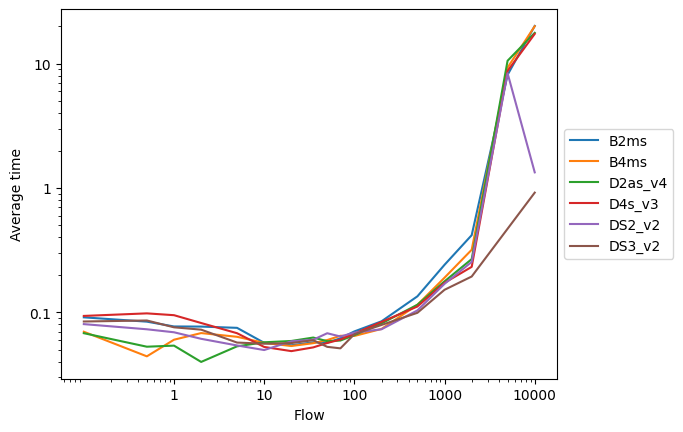

In [16]:
# Visualize data
import matplotlib.pyplot as plt
from ast import literal_eval
import os
import random
import string
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark import SparkConf, SparkContext
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

conf = SparkConf().setAppName("appName").setMaster("local")
sc = SparkContext.getOrCreate(conf=conf)
spark = SparkSession(sc)


# Get the list of files
files = os.listdir('data')

data = pd.read_csv('data/data_Kafka_train.csv')

# Get the average time for each kafka machine and each flow
data = data.groupby(['machine_kafka', 'flow']).agg({'average': ['mean', 'median', 'max', 'min']}).reset_index()

# Visualize the average time for the first machine in a graph (average Time and flow)

for machine in data['machine_kafka'].unique():
    datatmp = data[data['machine_kafka'] == machine]
    plt.plot(datatmp['flow'], datatmp['average']['mean'], label=machine)


# Draw the legend outside only unique names
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
# flow is exponential
plt.xscale('log')
plt.yscale('log')
# replace the 10 by the actual value
plt.xticks([1, 10, 100, 1000, 10000], ['1', '10', '100', '1000', '10000'])
plt.yticks([0.1, 1, 10], ['0.1','1', '10'])
plt.xlabel('Flow')
plt.ylabel('Average time')
plt.show()

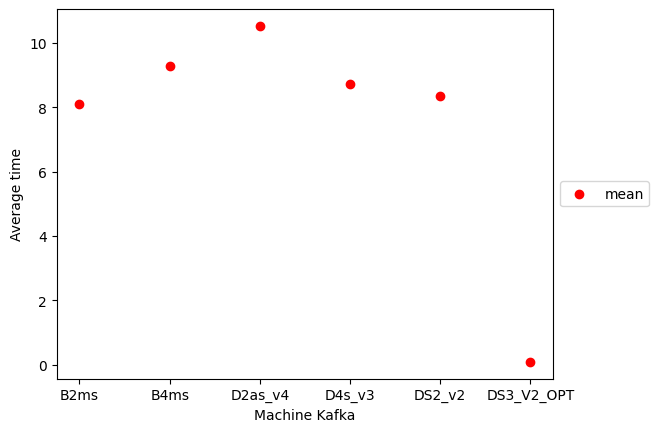

In [1]:
# Visualize data
import matplotlib.pyplot as plt
from ast import literal_eval
import os
import random
import string
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark import SparkConf, SparkContext
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from pyspark.sql.functions import lit

conf = SparkConf().setAppName("appName").setMaster("local")
sc = SparkContext.getOrCreate(conf=conf)
spark = SparkSession(sc)


# Get the list of files
files = os.listdir('data')

data = spark.read.csv('data/data_Kafka_train.csv', header=True, inferSchema=True)
data2 = spark.read.csv('data/merge_allds.csv', header=True, inferSchema=True)

# remove the column consumer and producer from data2
data2 = data2.drop('consumer', 'producer', 'batch_size')

# remove all the average time that are superior to 1
data2 = data2.filter(data2.average < 1)

# change the value of machine_kafka to DS3_V2_OPTIMIZED
data2 = data2.withColumn('machine_kafka', lit('DS3_V2_OPT'))

# switch the flow to 5000
data2 = data2.withColumn('flow', lit(5000))

# merge the two dataframes
data = data.union(data2)

# get the flow with value 5000
data = data.filter(data.flow == 5000)

# transform the dataframe to pandas
data = data.toPandas()

# for each kafka machine, get the average time, the median time, the max and the min and keep the machine_kafka column
data = data.groupby('machine_kafka').agg({'average': ['mean', 'median', 'max', 'min']}).reset_index()




# Visualize the difference between the average time and the machine kafka, color for each kafka machine
for i in range(0, len(data)):
    plt.scatter(data['machine_kafka'][i], data['average']['mean'][i], c='r', label='mean')

# Draw the legend outside only unique names
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Machine Kafka')
plt.ylabel('Average time')
plt.show()




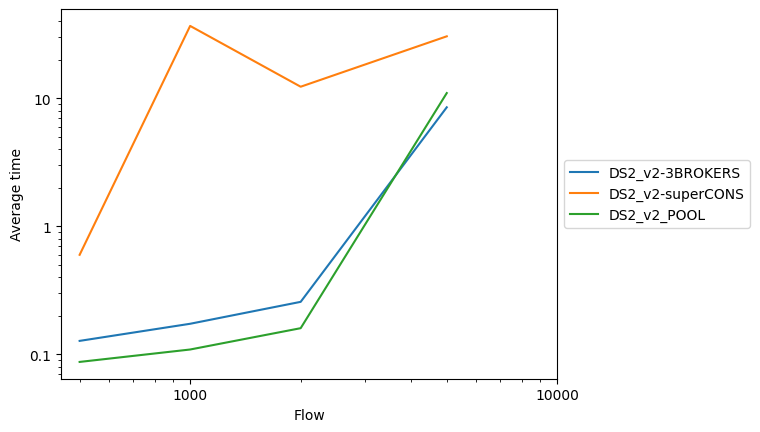

In [20]:
# Visualize data
import matplotlib.pyplot as plt
from ast import literal_eval
import os
import random
import string
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark import SparkConf, SparkContext
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

conf = SparkConf().setAppName("appName").setMaster("local")
sc = SparkContext.getOrCreate(conf=conf)
spark = SparkSession(sc)


# Get the list of files
files = os.listdir('data')

data = pd.read_csv('data/tryBroker.csv')

# Get the average time for each kafka machine and each flow
data = data.groupby(['machine_kafka', 'flow']).agg({'average': ['mean', 'median', 'max', 'min']}).reset_index()

# Visualize the average time for the first machine in a graph (average Time and flow)

for machine in data['machine_kafka'].unique():
    datatmp = data[data['machine_kafka'] == machine]
    plt.plot(datatmp['flow'], datatmp['average']['mean'], label=machine)


# Draw the legend outside only unique names
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
# flow is exponential
plt.xscale('log')
plt.yscale('log')
# replace the 10 by the actual value
plt.xticks([1000, 10000], ['1000', '10000'])
plt.yticks([0.1, 1, 10], ['0.1','1', '10'])
plt.xlabel('Flow')
plt.ylabel('Average time')
plt.show()